In [2]:
!pip install Bio

     |████████████████████████████████| 278 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 5.4 MB/s eta 0:00:011


In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

sequence = "LTYTDCTESGQNLCLCEGSNVCGQGNKCILGSDGEKNQCVTGEGTPKPQSHNDGDFEEIPEEYLQ"

record = SeqRecord(Seq(sequence), id="DB00001", description="Protein Chain")
print(record.format("fasta"))


>DB00001 Protein Chain
LTYTDCTESGQNLCLCEGSNVCGQGNKCILGSDGEKNQCVTGEGTPKPQSHNDGDFEEIP
EEYLQ



In [2]:
!pip install py3Dmol

In [3]:
import py3Dmol

view = py3Dmol.view(query="1A1B", format="pdb")  # Replace with actual PDB ID
view.setStyle({"cartoon": {"color": "spectrum"}})
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [59]:
!pip install xgboost

     |████████████████████████████████| 1.9 MB 2.8 MB/s eta 0:00:01


In [5]:
import os

import sqlite3
import pandas as pd

# Connect to the ChEMBL database
#db_path = "downloads/chembl_35_sqlite/chembl_35.db"  # Change this to your actual .db file path
db_path = os.path.expanduser("~/Downloads/chembl_35/chembl_35_sqlite/chembl_35.db")
conn = sqlite3.connect(db_path)

# Check available tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Available tables:", tables)


Available tables: [('action_type',), ('assay_type',), ('chembl_id_lookup',), ('confidence_score_lookup',), ('curation_lookup',), ('chembl_release',), ('source',), ('relationship_type',), ('target_type',), ('variant_sequences',), ('bioassay_ontology',), ('data_validity_lookup',), ('activity_smid',), ('activity_stds_lookup',), ('assay_classification',), ('atc_classification',), ('bio_component_sequences',), ('component_sequences',), ('protein_classification',), ('domains',), ('go_classification',), ('structural_alert_sets',), ('products',), ('frac_classification',), ('hrac_classification',), ('irac_classification',), ('research_stem',), ('organism_class',), ('patent_use_codes',), ('usan_stems',), ('version',), ('cell_dictionary',), ('docs',), ('target_dictionary',), ('tissue_dictionary',), ('molecule_dictionary',), ('activity_supp',), ('component_class',), ('component_domains',), ('component_go',), ('component_synonyms',), ('structural_alerts',), ('defined_daily_dose',), ('product_patent

In [38]:
query = "SELECT * FROM drug_mechanism LIMIT 5"
df = pd.read_sql(query, conn)

In [39]:
df.head()

,mec_id,record_id,molregno,mechanism_of_action,tid,site_id,action_type,direct_interaction,molecular_mechanism,disease_efficacy,mechanism_comment,selectivity_comment,binding_site_comment,variant_id
0,13,1343810,1124,Carbonic anhydrase VII inhibitor,11060,None,INHIBITOR,1,1,1,None,None,None,None
1,14,1344053,675068,Carbonic anhydrase I inhibitor,10193,None,INHIBITOR,1,1,1,None,None,None,None
2,15,1344649,674765,Carbonic anhydrase I inhibitor,10193,None,INHIBITOR,1,1,1,Expressed in eye,None,None,None
3,16,1343255,1085,Carbonic anhydrase I inhibitor,10193,None,INHIBITOR,1,1,1,None,None,None,None
4,17,1344903,1125,Carbonic anhydrase I inhibitor,10193,None,INHIBITOR,1,1,1,Expressed in eye,None,None,None


In [40]:
query = """
SELECT dm.molregno, dm.mechanism_of_action, cs.canonical_smiles, 
       cp.full_mwt, cp.alogp, cp.hba, cp.hbd
FROM drug_mechanism dm
JOIN compound_structures cs ON dm.molregno = cs.molregno
JOIN compound_properties cp ON dm.molregno = cp.molregno
LIMIT 1000;
"""
df = pd.read_sql(query, conn)
conn.close()

df.head()

,molregno,mechanism_of_action,canonical_smiles,full_mwt,alogp,hba,hbd
0,1124,Carbonic anhydrase VII inhibitor,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,236.28,-1.42,6.0,1.0
1,675068,Carbonic anhydrase I inhibitor,COc1ccccc1OCC(O)COC(N)=O,241.24,0.53,5.0,2.0
2,674765,Carbonic anhydrase I inhibitor,CC(=O)Nc1nnc(S([NH-])(=O)=O)s1.[Na+],244.23,-0.86,6.0,2.0
3,1085,Carbonic anhydrase I inhibitor,NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1,305.16,0.29,4.0,2.0
4,1125,Carbonic anhydrase I inhibitor,CC(=O)Nc1nnc(S(N)(=O)=O)s1,222.25,-0.86,6.0,2.0


In [69]:
query = """
SELECT dm.molregno, dm.mechanism_of_action, cs.canonical_smiles, 
       cp.full_mwt, cp.alogp, cp.hba, cp.hbd
FROM drug_mechanism dm
JOIN compound_structures cs ON dm.molregno = cs.molregno
JOIN compound_properties cp ON dm.molregno = cp.molregno
LIMIT 1000;
"""
data = pd.read_sql(query, conn)
conn.close()

data.head()

,molregno,mechanism_of_action,canonical_smiles,full_mwt,alogp,hba,hbd
0,1124,Carbonic anhydrase VII inhibitor,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,236.28,-1.42,6.0,1.0
1,675068,Carbonic anhydrase I inhibitor,COc1ccccc1OCC(O)COC(N)=O,241.24,0.53,5.0,2.0
2,674765,Carbonic anhydrase I inhibitor,CC(=O)Nc1nnc(S([NH-])(=O)=O)s1.[Na+],244.23,-0.86,6.0,2.0
3,1085,Carbonic anhydrase I inhibitor,NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1,305.16,0.29,4.0,2.0
4,1125,Carbonic anhydrase I inhibitor,CC(=O)Nc1nnc(S(N)(=O)=O)s1,222.25,-0.86,6.0,2.0


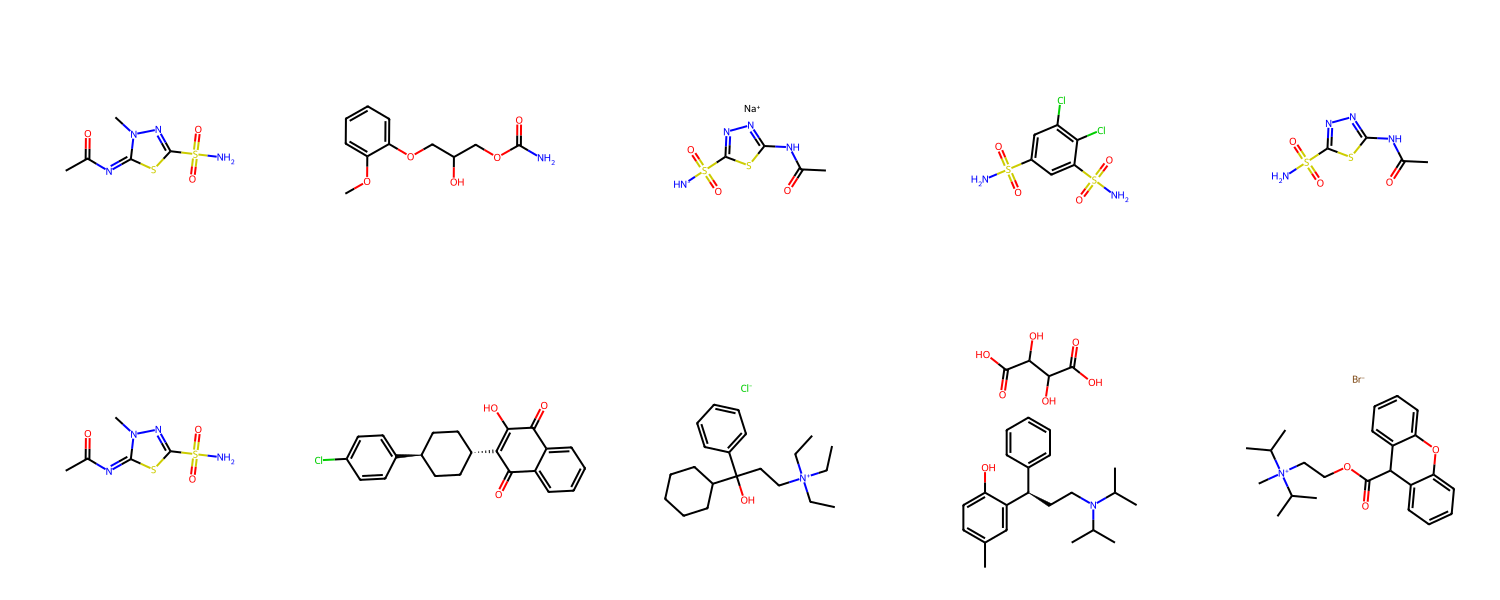

In [70]:
from rdkit import Chem
from rdkit.Chem import Draw

# Select first 10 SMILES from your dataset
smiles_list = data['canonical_smiles'].dropna().head(10).tolist()

# Convert SMILES to RDKit molecules
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Display molecules in a grid
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 300))

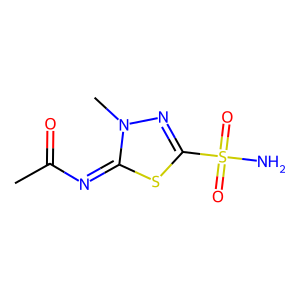

In [72]:
smiles = data['canonical_smiles'].dropna().iloc[0]  # Get first valid SMILES
mol = Chem.MolFromSmiles(smiles)

# Show the molecule
Draw.MolToImage(mol)


In [79]:
import py3Dmol
from IPython.display import display, HTML

def showmol(smiles):
    view = py3Dmol.view(width=400, height=400)
    view.addModel(smiles, "smi")
    view.setStyle({'stick': {}})
    view.zoomTo()
    return display(HTML(view._repr_html_()))

# Example SMILES
smiles = "CCO"  # Ethanol (change this to your molecule)
showmol(smiles)
view.show()  # May not work



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<IPython.core.display.HTML object>

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [29]:
!pip install rdkit


     |████████████████████████████████| 27.7 MB 298 kB/s eta 0:00:01


In [41]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# Function to convert SMILES to Morgan fingerprints
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    else:
        return np.zeros(n_bits)

# Apply function to convert SMILES
df['fingerprint'] = df['canonical_smiles'].apply(smiles_to_fingerprint)

# Expand fingerprint into separate columns
fingerprint_df = pd.DataFrame(df['fingerprint'].tolist())

# Drop original SMILES and fingerprint columns
df = df.drop(columns=['canonical_smiles', 'fingerprint'])

# Concatenate new fingerprint features
df = pd.concat([df, fingerprint_df], axis=1)

df.head()  # Check new dataframe


[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerator
[15:44:04] DEPRECATION WARNING: please use MorganGenerat

[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerat

[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerat

[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerat

[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerator
[15:44:05] DEPRECATION WARNING: please use MorganGenerat

[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerator
[15:44:06] DEPRECATION WARNING: please use MorganGenerat

,molregno,mechanism_of_action,full_mwt,alogp,hba,hbd,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1124,Carbonic anhydrase VII inhibitor,236.28,-1.42,6.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,675068,Carbonic anhydrase I inhibitor,241.24,0.53,5.0,2.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,674765,Carbonic anhydrase I inhibitor,244.23,-0.86,6.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1085,Carbonic anhydrase I inhibitor,305.16,0.29,4.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1125,Carbonic anhydrase I inhibitor,222.25,-0.86,6.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.isnull().sum()
df.dropna(inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode mechanism_of_action
le = LabelEncoder()
df['mechanism_of_action'] = le.fit_transform(df['mechanism_of_action'])

print(df['mechanism_of_action'].unique())  # Check encoded classes


[ 30  27  41 131 130  45 225  84  36 198 148  28 172  46  15 202 157 102
 141 109 162  99  98 147 103  56  57  55  58 207 175 174 201  47 115  14
  13  68  59  60 166  66 194  17 129 128 210 199 104  20  21  19 182 181
 203 187 197  16  26 158 134 151 224 170 178  76 168   5 195 179 180 149
 143 142 230 228  12 193  24  48 101 100  51 169 200  49 209  94  89 208
 220 226  40 185 112 171 173 177 176 221 164 160  74 163  44  43 123 122
 161   4  69 196 165  78 227  50 218  63  64 125 126 127  33   3   2 223
  42  38  85  86 107 124 216 140  23 132 108  53  54  34  67  72  71 184
 116 137 135 136  25 213  31 113  82  92  93 214 215 144 188 217 205 106
  39  80   0 159  97  29  22 114  83  37 118  81 212   1 111 119 117 211
 152 222 120 229  52 167  79  96 186  35 154 156 155 183 204 190 219 191
 192  90  65 189 133  77  95 146 105  75  70  73 110 153  32 138 139 206
 150  18  11  10  87  88 145 121   8   9  61  62  91   7   6]


In [44]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['mechanism_of_action', 'molregno'])  # Features
y = df['mechanism_of_action']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (760, 2052), Test size: (191, 2052)


In [66]:
y_train.shape,y_test.shape

((760,), (191,))

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


/Users/sathyakrishnasamy/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Accuracy: 0.4241


/Users/sathyakrishnasamy/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [65]:
len(df['mechanism_of_action'].unique())

231

In [8]:
query = """
SELECT 
    *
FROM assays


"""
df = pd.read_sql(query, conn)


df.head(10)

,assay_id,doc_id,description,assay_type,assay_test_type,assay_category,assay_organism,assay_tax_id,assay_strain,assay_tissue,...,curated_by,src_id,src_assay_id,chembl_id,cell_id,bao_format,tissue_id,variant_id,aidx,assay_group
0,1,11087,The compound was tested for the in vitro inhib...,B,None,None,None,NaN,None,None,...,Autocuration,1,None,CHEMBL615117,NaN,BAO_0000019,NaN,NaN,CLD0,None
1,2,684,Compound was evaluated for its ability to mobi...,F,None,None,None,NaN,None,None,...,Autocuration,1,None,CHEMBL615118,NaN,BAO_0000219,NaN,NaN,CLD0,None
2,3,15453,None,B,None,None,None,NaN,None,None,...,Autocuration,1,None,CHEMBL615119,NaN,BAO_0000019,NaN,NaN,CLD0,None
3,4,17841,Binding affinity against A2 adenosine receptor...,B,None,None,Bos taurus,9913.0,None,Striatum,...,Autocuration,1,None,CHEMBL615120,NaN,BAO_0000249,2435.0,NaN,CLD0,None
4,5,17430,In vitro cell cytotoxicity against 143-B cell ...,F,None,None,Homo sapiens,9606.0,None,None,...,Intermediate,1,None,CHEMBL615121,163.0,BAO_0000219,NaN,NaN,CLD0,None
5,6,17430,In vitro cell cytotoxicity against 143-B cell ...,F,None,None,Homo sapiens,9606.0,None,None,...,Intermediate,1,None,CHEMBL615122,163.0,BAO_0000219,NaN,NaN,CLD0,None
6,7,13799,Cytotoxic Activity was evaluated against 143B ...,F,None,None,Mus musculus,10090.0,None,None,...,Intermediate,1,None,CHEMBL615123,163.0,BAO_0000219,NaN,NaN,CLD0,None
7,8,17774,In vitro cell cytotoxicity was determined agai...,F,None,None,Homo sapiens,9606.0,None,None,...,Expert,1,None,CHEMBL615124,163.0,BAO_0000219,NaN,NaN,CLD0,None
8,9,3801,Inhibitory activity against tumor osteosarcoma...,F,None,None,Homo sapiens,9606.0,None,None,...,Intermediate,1,None,CHEMBL615125,163.0,BAO_0000219,NaN,NaN,CLD0,None
9,10,17430,In vitro cell cytotoxicity against 143B-LTK ce...,F,None,None,Homo sapiens,9606.0,None,None,...,Intermediate,1,None,CHEMBL615126,163.0,BAO_0000219,NaN,NaN,CLD0,None


In [18]:
query = """
SELECT 
    *
FROM drug_mechanism


"""
df = pd.read_sql(query, conn)


df.tail(10)

,mec_id,record_id,molregno,mechanism_of_action,tid,site_id,action_type,direct_interaction,molecular_mechanism,disease_efficacy,mechanism_comment,selectivity_comment,binding_site_comment,variant_id
7320,9841,3956792,2832773,26S proteasome inhibitor,106197.0,NaN,INHIBITOR,1,1,1,None,None,Binds the chymotrypsin-like subunit of the pro...,NaN
7321,9842,3956793,2832774,Kappa opioid receptor agonist,137.0,NaN,AGONIST,1,1,1,None,None,None,NaN
7322,9843,3956801,2832776,PI3-kinase p110-delta subunit inhibitor,11177.0,NaN,INHIBITOR,1,1,1,None,None,None,NaN
7323,9844,3956801,2832776,PI3-kinase p110-gamma subunit inhibitor,11939.0,NaN,INHIBITOR,1,1,1,None,None,None,NaN
7324,9845,1701462,1240372,Ultrasound contrast agent,NaN,NaN,None,1,1,1,None,None,None,NaN
7325,9846,1703674,421070,Mu opioid receptor agonist,129.0,NaN,AGONIST,1,1,1,None,None,None,NaN
7326,9847,1696375,1380778,Surface antigen (HBsAg) binding agent,121142.0,NaN,BINDING AGENT,1,1,1,None,None,None,NaN
7327,9848,1344924,1369657,Diagnostic agent,NaN,NaN,None,1,1,1,None,None,None,NaN
7328,9849,1344261,1369660,Diagnostic,NaN,NaN,None,1,1,1,None,None,None,NaN
7329,9851,1343477,563318,Human immunodeficiency virus type 1 protease i...,191.0,NaN,INHIBITOR,1,1,1,None,Approximately tenfold selectivity for HIV–1 ov...,None,NaN


In [22]:
count = (df['mechanism_of_action'] == 'Mu opioid receptor agonist').sum()
print(count)


35


In [23]:

query = """
SELECT 
    *
FROM site_components


"""
df = pd.read_sql(query, conn)


df.head(10)

,sitecomp_id,site_id,component_id,domain_id,site_residues
0,2,1504,4968,2748.0,None
1,3,1505,4800,2951.0,None
2,4,2,4909,2781.0,None
3,5,1507,4767,3139.0,None
4,6,636,3909,2702.0,None
5,7,217,4512,3234.0,None
6,8,1299,4067,3916.0,None
7,9,1300,3951,4003.0,None
8,12,425,377,3376.0,None
9,13,1508,148,3683.0,None


In [28]:

query = """
SELECT 
    *
FROM target_type


"""
df = pd.read_sql(query, conn)


df.head(10),df.shape

(        target_type                                        target_desc  \
 0             ADMET  Target is not applicable for an ADMET assay (e...   
 1         CELL-LINE                     Target is a specific cell-line   
 2  CHIMERIC PROTEIN  Target is a fusion of two different proteins, ...   
 3             LIPID                                  Target is a lipid   
 4     MACROMOLECULE  Target is a biological macromolecule (e.g., gl...   
 5             METAL                       Target is a metal e.g., iron   
 6         MOLECULAR  Target has been identified as a defined molecu...   
 7         NO TARGET  Target is not applicable for a screening assay...   
 8     NON-MOLECULAR  Target has not been defined at a molecular lev...   
 9      NUCLEIC-ACID                          Target is DNA, RNA or PNA   
 
      parent_type  
 0      UNDEFINED  
 1  NON-MOLECULAR  
 2        PROTEIN  
 3      MOLECULAR  
 4      MOLECULAR  
 5      MOLECULAR  
 6           None  
 7      UNDEF